/opt/anaconda3/envs/mecab_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/mecab_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/mecab_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/mecab_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/mecab_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLA

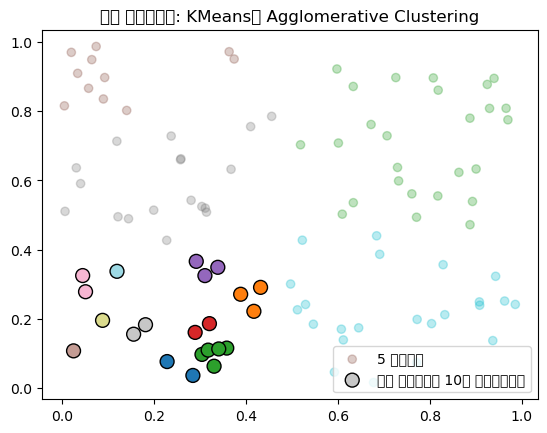

In [1]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

# 1. 데이터 생성
np.random.seed(42)
data = np.random.rand(100, 2)

# 2. 1차 클러스터링: KMeans로 5개 클러스터로 분할
kmeans_5 = KMeans(n_clusters=5, random_state=42)
labels_5 = kmeans_5.fit_predict(data)

# 3. 2차 클러스터링: 선택된 클러스터 내에서 Agglomerative Clustering 적용
selected_label = 0
data_selected = data[labels_5 == selected_label]

if len(data_selected) < 10:
    print("선택한 클러스터에 10개의 클러스터를 생성할 데이터가 충분하지 않습니다.")
else:
    # Agglomerative Clustering으로 10개 클러스터로 재분할
    agg_clustering = AgglomerativeClustering(n_clusters=10)
    labels_10 = agg_clustering.fit_predict(data_selected)

    # 4. 시각화
    plt.scatter(data[:, 0], data[:, 1], c=labels_5, cmap='tab10', alpha=0.3, label='5 클러스터')
    plt.scatter(data_selected[:, 0], data_selected[:, 1], c=labels_10, cmap='tab20', edgecolors='k', s=100, label='선택 클러스터의 10개 서브클러스터')
    plt.title('다중 클러스터링: KMeans와 Agglomerative Clustering')
    plt.legend()
    plt.show()


## 2. 동적 클러스터링

In [4]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from flask import Flask, request, jsonify
import matplotlib.pyplot as plt
import io
import base64

app = Flask(__name__)

# 초기 데이터 생성
data = np.random.rand(100, 2)

@app.route('/cluster', methods=['POST'])
def cluster():
    params = request.json
    algorithm = params.get('algorithm', 'kmeans')
    selected_vector = params.get('selected_vector', None)

    if selected_vector:
        # 선택된 벡터와 가장 가까운 점을 기준으로 데이터 필터링
        selected_vector = np.array(selected_vector)
        distances = np.linalg.norm(data - selected_vector, axis=1)
        selected_data = data[distances < 0.2]  # 반경 0.2 이내 데이터 선택
    else:
        selected_data = data

    if algorithm == 'kmeans':
        n_clusters = params.get('n_clusters', 3)
        model = KMeans(n_clusters=n_clusters, random_state=42)
        labels = model.fit_predict(selected_data)
    elif algorithm == 'dbscan':
        eps = params.get('eps', 0.1)
        min_samples = params.get('min_samples', 2)
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(selected_data)
    else:
        return jsonify({'error': 'Unsupported algorithm'}), 400

    # 시각화
    plt.figure(figsize=(6, 4))
    plt.scatter(selected_data[:, 0], selected_data[:, 1], c=labels, cmap='tab10', edgecolor='k')
    plt.title('동적 클러스터링 결과')

    # 이미지 변환
    img = io.BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    img_base64 = base64.b64encode(img.read()).decode('utf-8')
    plt.close()

    return jsonify({'image': img_base64, 'labels': labels.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mecab_env/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/envs/mecab_env/lib/python3.9/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/envs/mecab_env/lib/python3.9/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
  File "/opt/anaconda3/envs/mecab_env/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
  File "/opt/anaconda3/envs/mecab_env/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 331, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/opt/anaconda3/envs/mecab_env/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 2

SystemExit: 1

/opt/anaconda3/envs/mecab_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
